## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from pathlib import Path
plt.style.use("ggplot")

## Data

In [2]:
PATH_DATA = Path("../Data/")

In [3]:
df = pd.read_csv(PATH_DATA / "british airways.csv", parse_dates=["Date"])

In [4]:
df

,Date,Adjusted Passenger Count
0,2005-07-01,21686
1,2005-08-01,20084
2,2005-09-01,20635
3,2005-10-01,18988
4,2005-11-01,15554
...,...,...
124,2015-11-01,19800
125,2015-12-01,17560
126,2016-01-01,18397
127,2016-02-01,16230


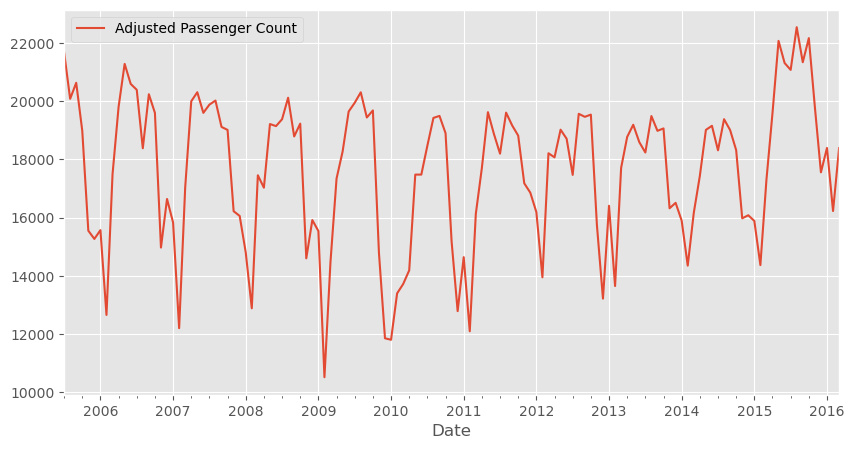

In [5]:
df.plot(x="Date", y="Adjusted Passenger Count", figsize=(10, 5));

In [6]:
pct_train = 0.8
n_train = int(pct_train * len(df))
train = df.iloc[:n_train]
test = df.iloc[n_train:]

In [7]:
train.shape, test.shape

((103, 2), (26, 2))

## Model

In [15]:
prophet_initial = Prophet()
prophet_initial.fit(train.rename(columns={"Date": "ds", "Adjusted Passenger Count": "y"}))

15:22:38 - cmdstanpy - INFO - Chain [1] start processing
15:22:38 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = prophet_initial.make_future_dataframe(periods=len(test), freq="M")
future

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/forecaster.py:1796: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
0,2005-07-01
1,2005-08-01
2,2005-09-01
3,2005-10-01
4,2005-11-01
...,...
124,2015-10-31
125,2015-11-30
126,2015-12-31
127,2016-01-31


In [17]:
forecast = prophet_initial.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-01,18527.932878,18946.561859,21379.507128,18527.932878,18527.932878,1703.398985,1703.398985,1703.398985,1703.398985,1703.398985,1703.398985,0.0,0.0,0.0,20231.331863
1,2005-08-01,18495.488576,19405.048204,21873.120532,18495.488576,18495.488576,2143.015183,2143.015183,2143.015183,2143.015183,2143.015183,2143.015183,0.0,0.0,0.0,20638.503759
2,2005-09-01,18463.044275,19162.807258,21596.154944,18463.044275,18463.044275,1936.032976,1936.032976,1936.032976,1936.032976,1936.032976,1936.032976,0.0,0.0,0.0,20399.077250
3,2005-10-01,18431.646563,18928.273576,21421.208686,18431.646563,18431.646563,1719.514237,1719.514237,1719.514237,1719.514237,1719.514237,1719.514237,0.0,0.0,0.0,20151.160800
4,2005-11-01,18399.202261,15178.952705,17698.834343,18399.202261,18399.202261,-1988.588090,-1988.588090,-1988.588090,-1988.588090,-1988.588090,-1988.588090,0.0,0.0,0.0,16410.614172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2015-10-31,18497.178528,16082.209008,18484.514430,18382.420965,18611.124922,-1145.810911,-1145.810911,-1145.810911,-1145.810911,-1145.810911,-1145.810911,0.0,0.0,0.0,17351.367616
125,2015-11-30,18522.096499,16087.080867,18520.665444,18398.688399,18643.407546,-1235.272169,-1235.272169,-1235.272169,-1235.272169,-1235.272169,-1235.272169,0.0,0.0,0.0,17286.824330
126,2015-12-31,18547.845069,14178.534731,16772.780411,18416.975859,18676.679170,-3000.972632,-3000.972632,-3000.972632,-3000.972632,-3000.972632,-3000.972632,0.0,0.0,0.0,15546.872437
127,2016-01-31,18573.593640,13094.127428,15618.086198,18434.049212,18709.425047,-4193.497134,-4193.497134,-4193.497134,-4193.497134,-4193.497134,-4193.497134,0.0,0.0,0.0,14380.096506


/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


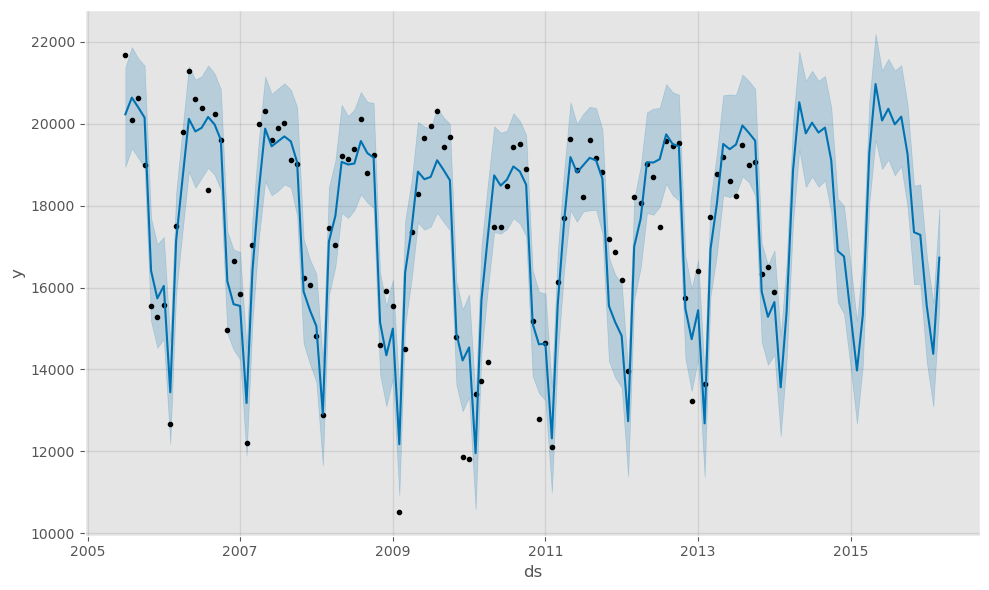

In [18]:
prophet_initial.plot(forecast);

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

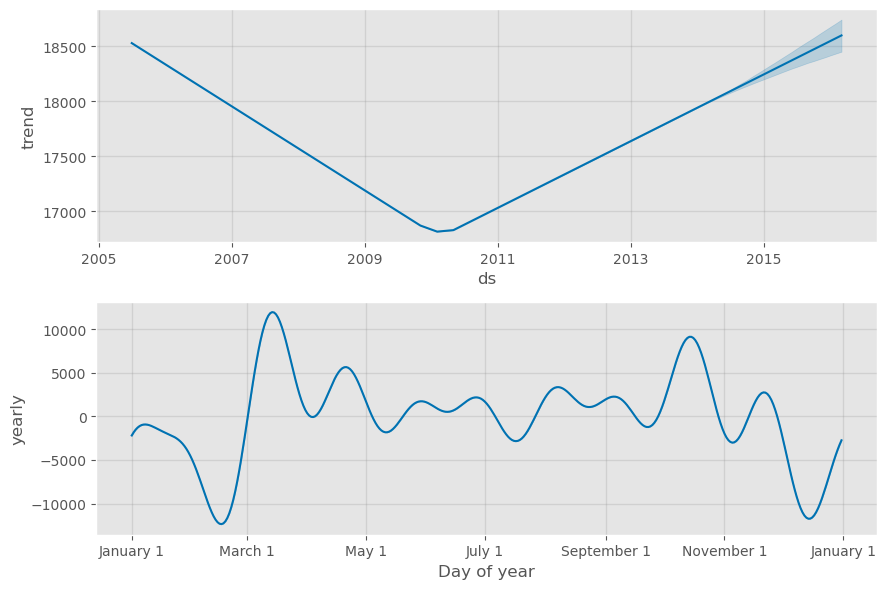

In [19]:
prophet_initial.plot_components(forecast);

In [20]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse(test["Adjusted Passenger Count"], forecast["yhat"].iloc[-len(test):])

1469.202780867335

## Changepoints

In [21]:
from prophet.plot import add_changepoints_to_plot

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


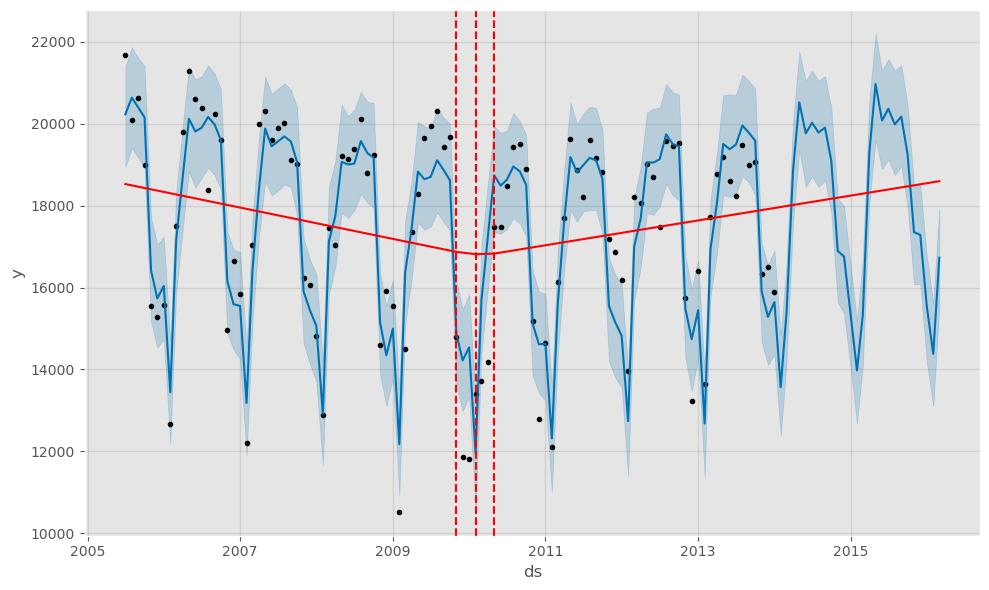

In [22]:
fig = prophet_initial.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_initial, forecast)

In [23]:
prophet_initial.changepoints

3    2005-10-01
6    2006-01-01
10   2006-05-01
13   2006-08-01
16   2006-11-01
19   2007-02-01
23   2007-06-01
26   2007-09-01
29   2007-12-01
32   2008-03-01
36   2008-07-01
39   2008-10-01
42   2009-01-01
45   2009-04-01
49   2009-08-01
52   2009-11-01
55   2010-02-01
58   2010-05-01
62   2010-09-01
65   2010-12-01
68   2011-03-01
71   2011-06-01
75   2011-10-01
78   2012-01-01
81   2012-04-01
Name: ds, dtype: datetime64[ns]

In [24]:
perf = {}

for n_cp in range(1, 21):
    prophet = Prophet(n_changepoints=n_cp)
    prophet.fit(train.rename(columns={"Date": "ds", "Adjusted Passenger Count": "y"}))
    forecast = prophet.predict(future)
    perf[n_cp] = rmse(test["Adjusted Passenger Count"], forecast["yhat"].iloc[-len(test):])
    print(f"{n_cp = }, {perf[n_cp] = }")

15:22:43 - cmdstanpy - INFO - Chain [1] start processing


15:22:43 - cmdstanpy - INFO - Chain [1] done processing
15:22:43 - cmdstanpy - INFO - Chain [1] start processing
15:22:43 - cmdstanpy - INFO - Chain [1] done processing
15:22:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
15:22:43 - cmdstanpy - INFO - Chain [1] start processing
15:22:43 - cmdstanpy - INFO - Chain [1] done processing
15:22:43 - cmdstanpy - INFO - Chain [1] start processing
15:22:43 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 1, perf[n_cp] = 2430.9410460092486
n_cp = 2, perf[n_cp] = 2071.66679950361


15:22:44 - cmdstanpy - INFO - Chain [1] start processing
15:22:44 - cmdstanpy - INFO - Chain [1] done processing
15:22:44 - cmdstanpy - INFO - Chain [1] start processing
15:22:44 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 3, perf[n_cp] = 1768.8140498387224
n_cp = 4, perf[n_cp] = 1595.2481840935277


15:22:44 - cmdstanpy - INFO - Chain [1] start processing
15:22:44 - cmdstanpy - INFO - Chain [1] done processing
15:22:44 - cmdstanpy - INFO - Chain [1] start processing
15:22:44 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 5, perf[n_cp] = 1648.66702030545
n_cp = 6, perf[n_cp] = 1617.9640291416067


15:22:44 - cmdstanpy - INFO - Chain [1] start processing
15:22:44 - cmdstanpy - INFO - Chain [1] done processing
15:22:44 - cmdstanpy - INFO - Chain [1] start processing
15:22:44 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 7, perf[n_cp] = 1675.9292437507968
n_cp = 8, perf[n_cp] = 1610.5898809472146


15:22:45 - cmdstanpy - INFO - Chain [1] start processing
15:22:45 - cmdstanpy - INFO - Chain [1] done processing
15:22:45 - cmdstanpy - INFO - Chain [1] start processing
15:22:45 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 9, perf[n_cp] = 1599.0256289041786
n_cp = 10, perf[n_cp] = 1799.443762865222


15:22:45 - cmdstanpy - INFO - Chain [1] start processing
15:22:45 - cmdstanpy - INFO - Chain [1] done processing
15:22:45 - cmdstanpy - INFO - Chain [1] start processing
15:22:45 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 11, perf[n_cp] = 1651.066859401312
n_cp = 12, perf[n_cp] = 1619.5436815258404


15:22:45 - cmdstanpy - INFO - Chain [1] start processing
15:22:45 - cmdstanpy - INFO - Chain [1] done processing
15:22:45 - cmdstanpy - INFO - Chain [1] start processing
15:22:45 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 13, perf[n_cp] = 1764.0567504711944
n_cp = 14, perf[n_cp] = 1544.5362516827481


15:22:45 - cmdstanpy - INFO - Chain [1] start processing
15:22:45 - cmdstanpy - INFO - Chain [1] done processing
15:22:46 - cmdstanpy - INFO - Chain [1] start processing
15:22:46 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 15, perf[n_cp] = 1579.8444025261508
n_cp = 16, perf[n_cp] = 1553.1664212377057


15:22:46 - cmdstanpy - INFO - Chain [1] start processing
15:22:46 - cmdstanpy - INFO - Chain [1] done processing
15:22:46 - cmdstanpy - INFO - Chain [1] start processing
15:22:46 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 17, perf[n_cp] = 1626.6983551064263
n_cp = 18, perf[n_cp] = 1613.6165704998914


15:22:46 - cmdstanpy - INFO - Chain [1] start processing
15:22:46 - cmdstanpy - INFO - Chain [1] done processing


n_cp = 19, perf[n_cp] = 1658.0004013955256
n_cp = 20, perf[n_cp] = 1607.1598478617877


In [25]:
min(perf, key=perf.get), perf[min(perf, key=perf.get)]

(14, 1544.5362516827481)

## MCMC

In [27]:
interval_widths = (0.8, 0.85, 0.9, 0.95, 0.99)

15:26:41 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:26:42 - cmdstanpy - INFO - CmdStan done processing.
15:26:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-run

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

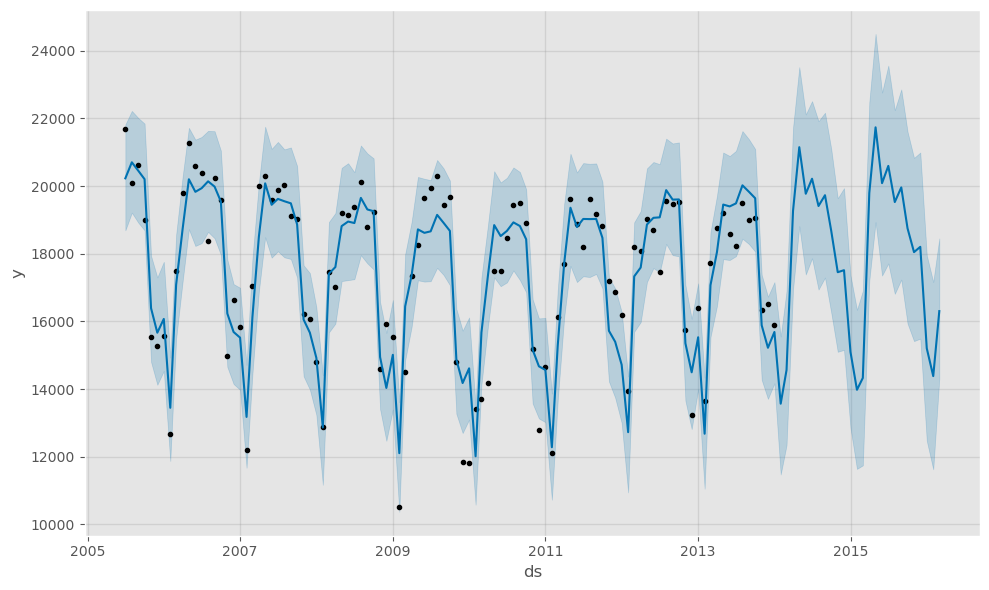

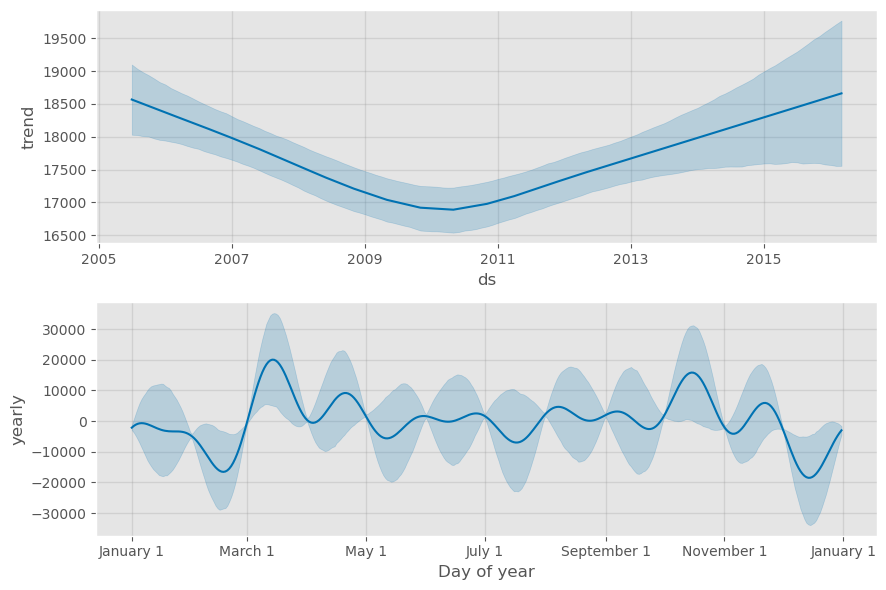

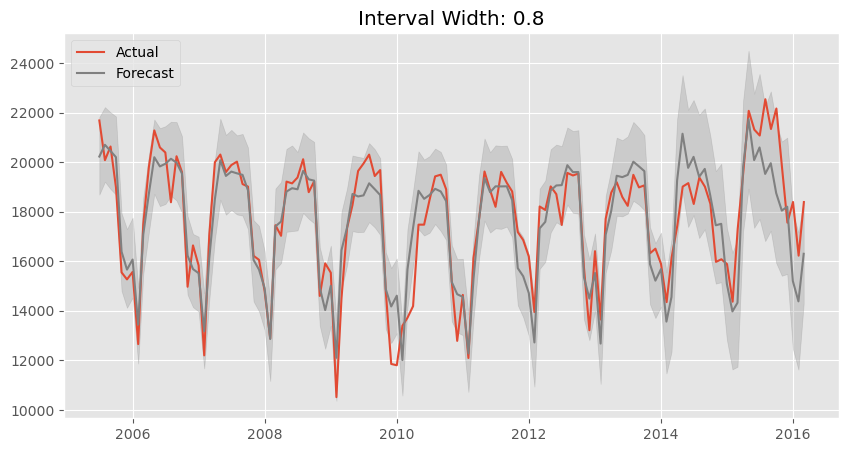

15:26:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:26:44 - cmdstanpy - INFO - CmdStan done processing.
15:26:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-run

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

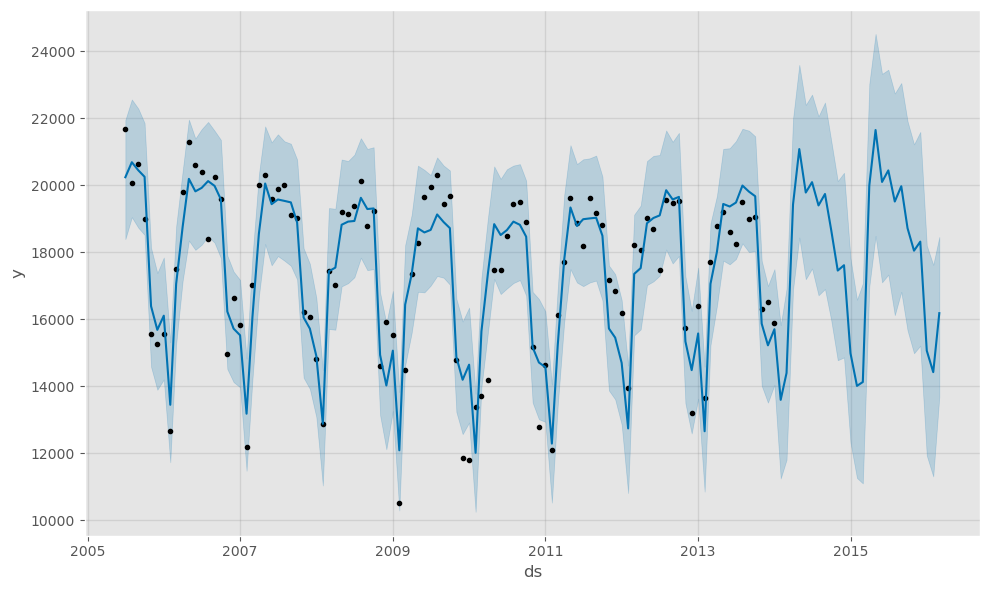

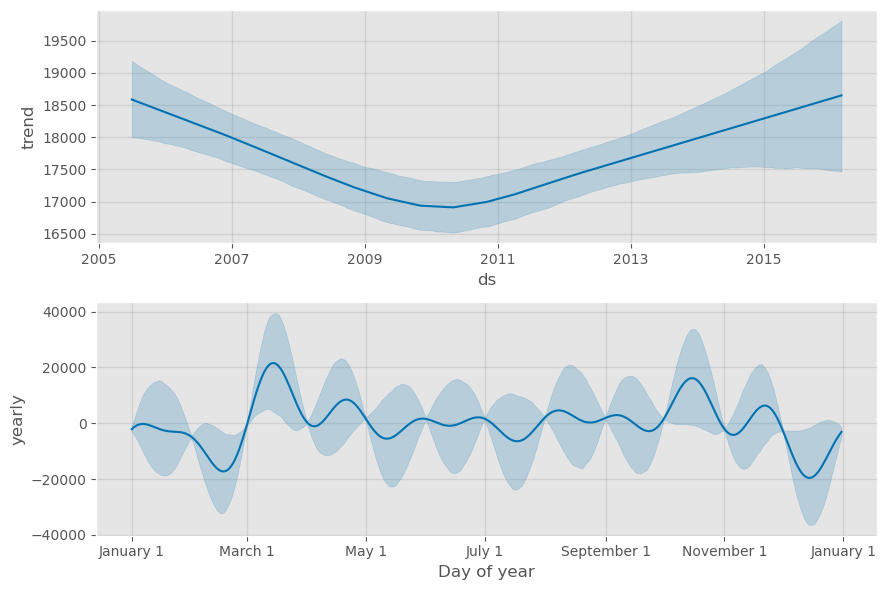

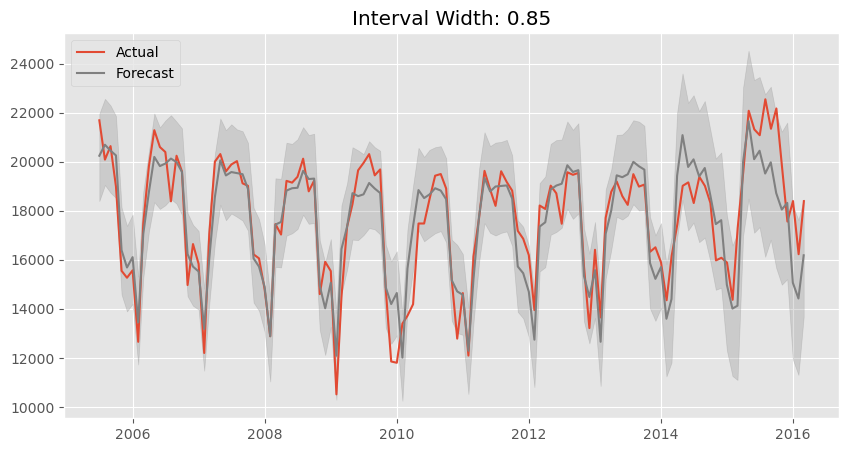

15:26:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:26:46 - cmdstanpy - INFO - CmdStan done processing.
15:26:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-run

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

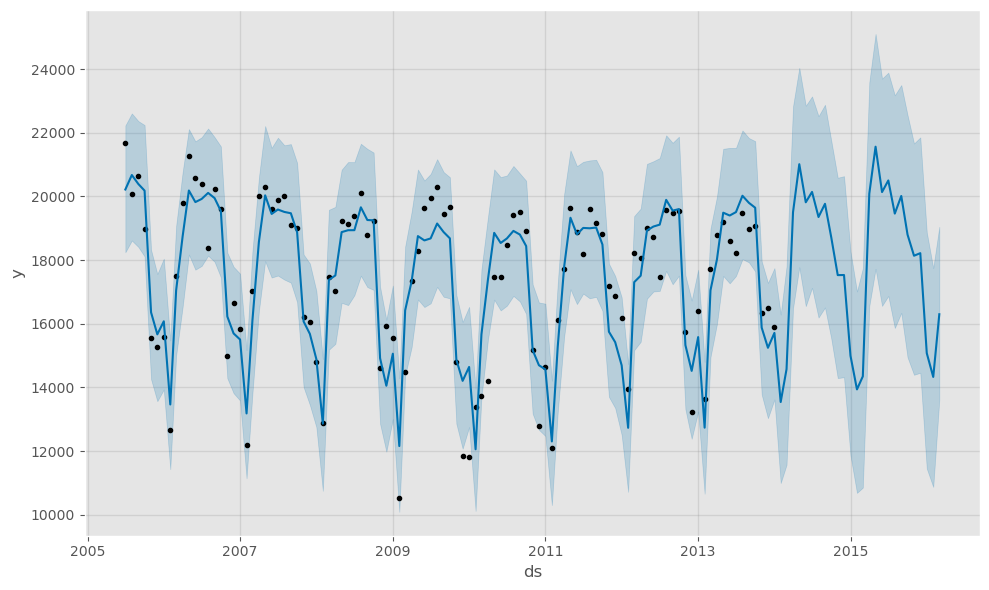

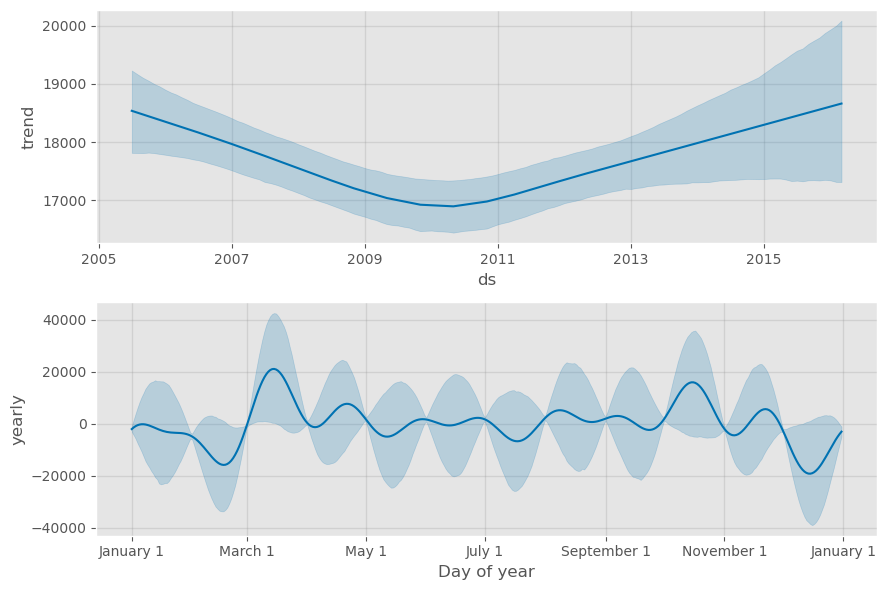

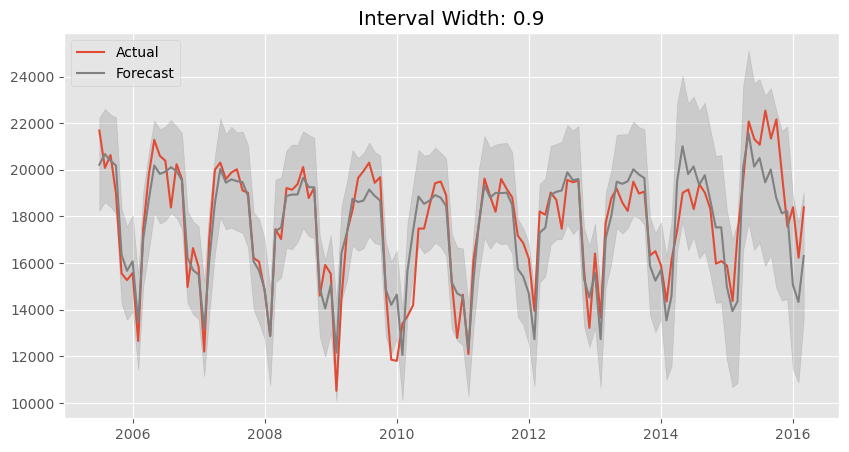

15:26:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:26:48 - cmdstanpy - INFO - CmdStan done processing.
15:26:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-run

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

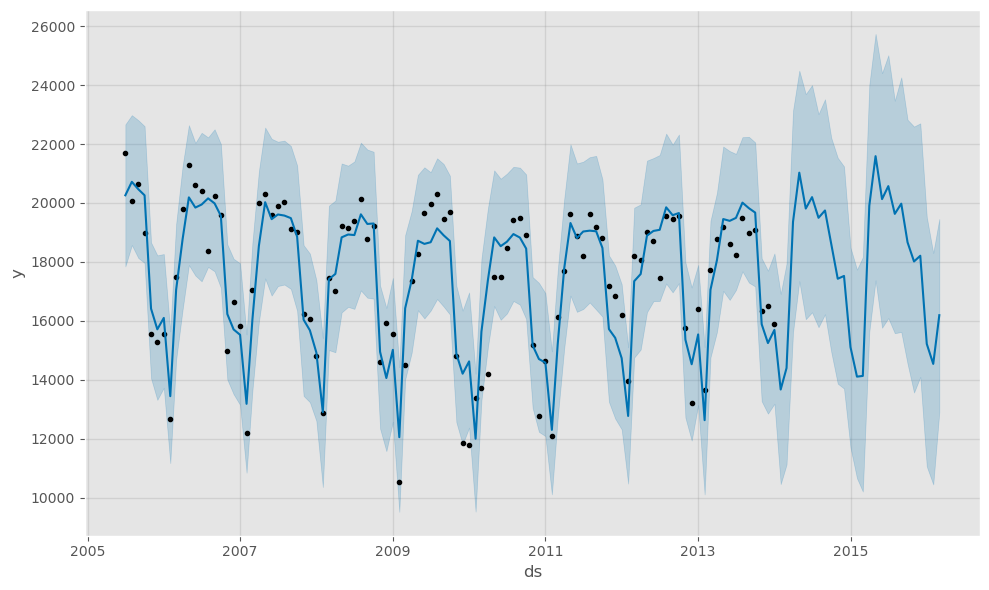

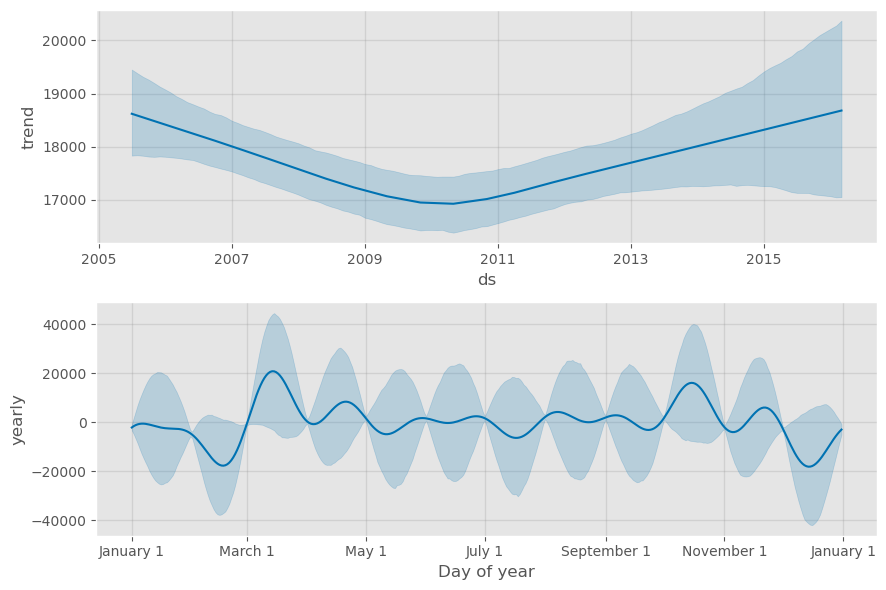

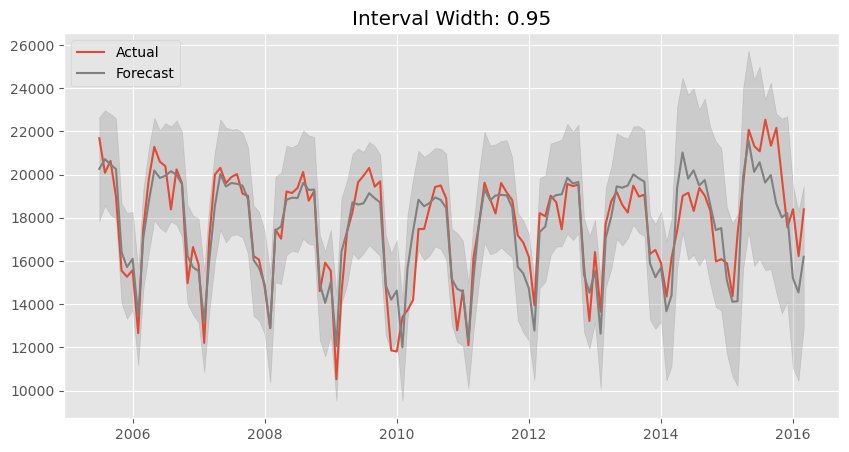

15:26:49 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:26:50 - cmdstanpy - INFO - CmdStan done processing.
15:26:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/home/conda/feedstock_root/build_artifacts/prophet_1662808654974/work/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-run

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

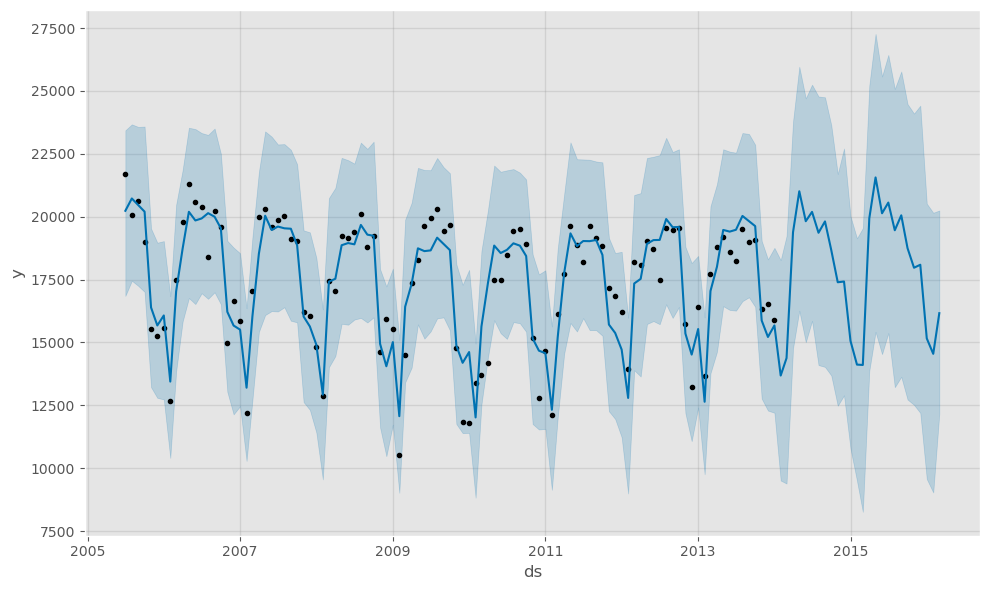

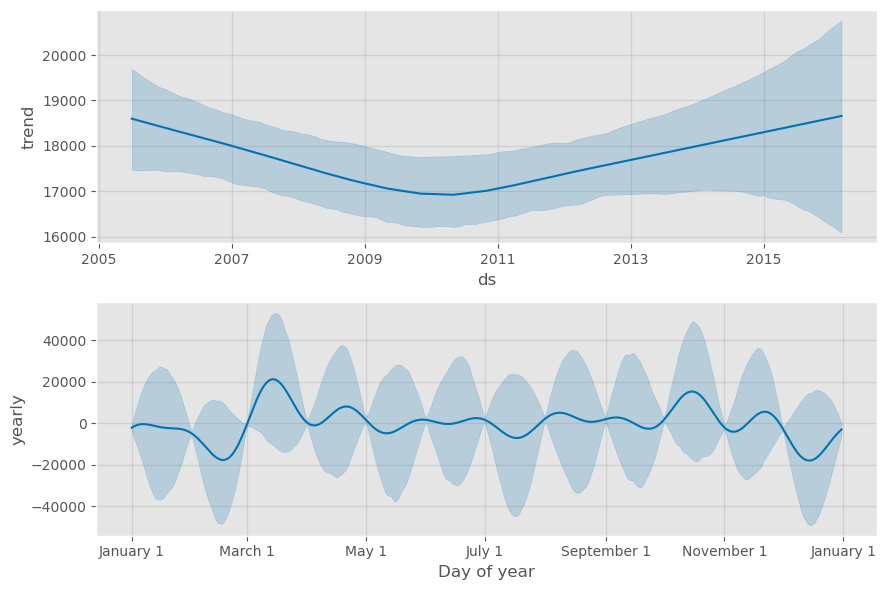

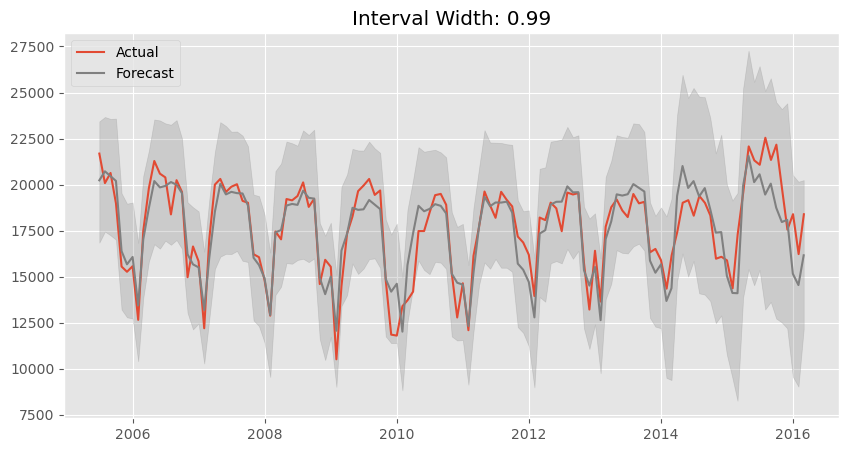

In [28]:
for interval_width in interval_widths:
    prophet = Prophet(interval_width=interval_width, n_changepoints=min(perf, key=perf.get), mcmc_samples=500)
    prophet.fit(train.rename(columns={"Date": "ds", "Adjusted Passenger Count": "y"}))
    forecast = prophet.predict(future)
    # plot
    fig = prophet.plot(forecast)
    # plot components
    fig = prophet.plot_components(forecast)
    # plot the actual time series against the mean predictions
    plt.figure(figsize=(10, 5))
    plt.plot(df["Date"], df["Adjusted Passenger Count"], label="Actual")
    plt.plot(forecast["ds"], forecast["yhat"], label="Forecast", color="gray")
    plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="gray", alpha=0.25)
    plt.legend()
    plt.title(f"Interval Width: {interval_width}")
    plt.show()